In [71]:
from preprocessing import parse_data, vectorize_texts, LABELS

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import pandas as pd
import numpy as np
# from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from tqdm import tqdm_notebook
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import matplotlib.pyplot as plt
import itertools

In [74]:
def get_metrics(model, test_data, test_label):
    y_pred = model.predict(test_data)
    acc = metrics.accuracy_score(test_label, y_pred)
    f1 = metrics.f1_score(test_label, y_pred, average='weighted')
    precision = metrics.precision_score(test_label, y_pred, average='weighted')
    recall = metrics.recall_score(test_label, y_pred, average='weighted')

    results = {
        "acc": acc,
        "f1": f1,
        "precision": precision,
        "recall": recall,
    }

    return results, y_pred


def add_result(table, results):
    table = table.append(results, ignore_index=True)
    return table


def create_table(meta):
    table = pd.DataFrame()
    new_index = {}
    for i, (key, data) in enumerate(meta.items()):
        new_index[i] = key
        metrics = data['metrics']
        table = add_result(table, metrics)
    table = table.rename(index=new_index)
    return table

# def plot_conf_matrixes(meta):
#     fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15,10))
#
#     for cls, ax in zip(meta.keys(), axes.flatten()):
#         y_pred = meta[cls]['prediction']
#
#         cm = confusion_matrix(y_test, y_pred)
#         _plot_confusion_matrix(cm, ax)
#         # ax.title.set_text(type(cls).__name__)
#     # plt.tight_layout()
#     plt.show()


def _plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Oranges):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(LABELS.keys()))
    plt.xticks(tick_marks, rotation=45)
    ax = plt.gca()
    ax.set_xticklabels((ax.get_xticks()).astype(str))
    plt.yticks(tick_marks)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def plot_confusion_matrix(y_test, y_pred, label='Confusion matrix'):
    cm = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)
    fig, ax = plt.subplots()
    _plot_confusion_matrix(cm, title=label)

In [3]:
texts, labels = parse_data()
vectors = vectorize_texts(texts)

100%|██████████| 3626/3626 [01:10<00:00, 51.31it/s] 


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
   vectors, labels, test_size=0.25, random_state=1000)


In [54]:
classifier_list = [
    MultinomialNB(),
    LogisticRegression(),
    # KNeighborsClassifier(n_neighbors=3),
    # DecisionTreeClassifier(),
    # svm.SVC(),
    # LinearDiscriminantAnalysis(),
    # RandomForestClassifier(),
    # AdaBoostClassifier(),
    # GradientBoostingClassifier()
                    ]

In [55]:
meta = {}

for classifier in tqdm_notebook(classifier_list):
    classifier.fit(X_train, y_train)
    name = str(classifier)[:-2]

    meta[name] = {}
    meta[name]['classifier'] = classifier
    meta[name]['metrics'], meta[name]['prediction'] = \
        get_metrics(classifier, X_test, y_test)


<ipython-input-55-9caff9d67856>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for classifier in tqdm_notebook(classifier_list):


  0%|          | 0/2 [00:00<?, ?it/s]

In [60]:
table = create_table(meta)
table

,acc,f1,precision,recall
MultinomialNB,0.881881,0.880335,0.881116,0.881881
LogisticRegression,0.872706,0.872897,0.874766,0.872706


<ipython-input-65-6778ff6e1f38>:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels((ax.get_xticks()).astype(str))


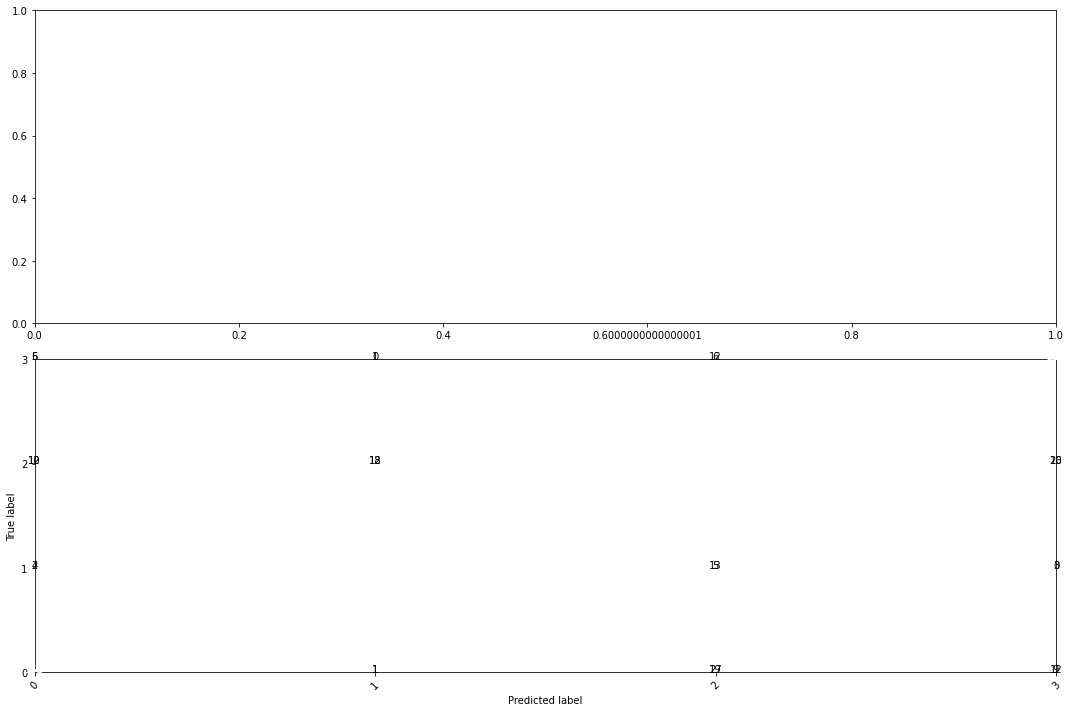

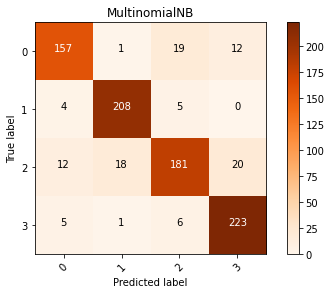

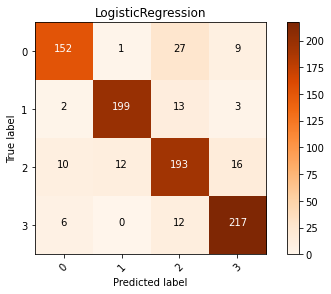

In [77]:
for cls in meta.keys():
    plot_confusion_matrix(y_test, meta[cls]['prediction'], str(meta[cls]['classifier'])[:-2])